In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('./stage1_data/stage1_train_data_imputation_remove_row.csv')
train_data.head()

,id,home_team_abbr,away_team_abbr,date,is_night_game,home_team_win,home_pitcher,away_pitcher,home_team_rest,away_team_rest,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0,0,30,0.698692,0.0,1.0,0,749,1.0,1.000000,...,1.133350,-0.974559,-0.900633,-1.093425,0.896974,-0.611051,-0.398111,0.949021,1.007072,0.340438
1,1,1,31,0.420935,1.0,0.0,1,750,2.0,1.155109,...,-0.044641,-0.878649,-1.079528,-1.719608,0.050448,-0.851738,-0.202878,0.489511,-0.876286,1.416154
2,2,1,32,0.434766,1.0,1.0,2,751,1.0,1.000000,...,-0.100180,-1.702937,-0.867762,1.992552,-0.404961,-0.132717,-0.106344,2.481020,-0.200110,-0.026083
3,3,2,33,0.304299,1.0,1.0,3,752,1.0,1.000000,...,-1.385079,-1.549095,-1.008470,0.116080,-1.236753,-0.119898,0.005985,1.646317,-0.764309,-0.024865
4,4,3,34,0.034766,1.0,0.0,4,753,1.0,1.000000,...,0.356122,0.663967,-0.123547,0.361822,-0.035276,-0.285671,-2.563819,0.527432,-0.911987,-1.109533


In [3]:
train_data.shape

(11067, 165)

In [4]:
total_nan_count = train_data.isna().sum().sum()
print(total_nan_count)

0


In [5]:
# Function to fill NaN values with group average
def fill_na_with_group_mean(df, group_col, target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(
        lambda x: x.fillna(x.mean())
    )

# Apply the function to all columns except the grouping column
group_column = 'home_team_abbr'

for column in train_data.columns:
    if column != group_column and train_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(train_data, group_column, column)




In [6]:
total_nan_count = train_data.isna().sum().sum()
print(total_nan_count)

0


In [7]:
# Function to fill NaN values with group average
def fill_na_with_group_mean(df, group_col, target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(
        lambda x: x.fillna(x.mean())
    )

# Apply the function to all columns except the grouping column
group_column = 'away_team_abbr'

for column in train_data.columns:
    if column != group_column and train_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(train_data, group_column, column)

In [8]:
train_data = train_data.dropna(axis=0)  # axis=0 means rows


In [9]:
total_nan_count = train_data.isna().sum().sum()
print(total_nan_count)

0


In [10]:
train_data.head()

,id,home_team_abbr,away_team_abbr,date,is_night_game,home_team_win,home_pitcher,away_pitcher,home_team_rest,away_team_rest,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0,0,30,0.698692,0.0,1.0,0,749,1.0,1.000000,...,1.133350,-0.974559,-0.900633,-1.093425,0.896974,-0.611051,-0.398111,0.949021,1.007072,0.340438
1,1,1,31,0.420935,1.0,0.0,1,750,2.0,1.155109,...,-0.044641,-0.878649,-1.079528,-1.719608,0.050448,-0.851738,-0.202878,0.489511,-0.876286,1.416154
2,2,1,32,0.434766,1.0,1.0,2,751,1.0,1.000000,...,-0.100180,-1.702937,-0.867762,1.992552,-0.404961,-0.132717,-0.106344,2.481020,-0.200110,-0.026083
3,3,2,33,0.304299,1.0,1.0,3,752,1.0,1.000000,...,-1.385079,-1.549095,-1.008470,0.116080,-1.236753,-0.119898,0.005985,1.646317,-0.764309,-0.024865
4,4,3,34,0.034766,1.0,0.0,4,753,1.0,1.000000,...,0.356122,0.663967,-0.123547,0.361822,-0.035276,-0.285671,-2.563819,0.527432,-0.911987,-1.109533


In [11]:
from sklearn.model_selection import train_test_split

train_data = train_data.replace({True: 1, False: 0})
X = train_data.drop(['home_team_win'], axis=1)
y = train_data['home_team_win'].astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

(8853, 164)
(8853,)


In [13]:
X_train.head()

,id,home_team_abbr,away_team_abbr,date,is_night_game,home_pitcher,away_pitcher,home_team_rest,away_team_rest,home_pitcher_rest,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
4864,4864,22,40,0.275514,1.0,41,1007,1.0,1.000000,5.0,...,-0.192648,0.956320,-0.473285,-0.296624,2.150689,-0.885174,-0.353780,-1.644759,-2.329743,0.202822
9779,9779,8,30,0.435140,1.0,246,961,0.0,0.000000,7.0,...,0.477241,-0.249963,0.501889,2.091440,-0.477909,-0.237266,-2.011557,-0.667536,-0.640731,-0.185344
5123,5123,0,58,0.856075,1.0,195,1108,1.0,1.155109,11.0,...,0.111076,1.799301,0.944898,0.275773,0.037159,-0.049211,-0.047111,-2.421019,-0.018128,0.265569
2405,2405,8,42,0.976075,0.0,68,805,1.0,1.000000,5.0,...,0.415193,-0.006036,0.440290,0.789226,0.311192,-0.377005,-0.400170,0.365190,-0.742364,-0.737696
480,480,16,52,0.004112,1.0,27,1020,1.0,1.000000,5.0,...,-0.193807,-0.843170,0.455659,0.078310,-0.774646,-0.282089,-0.132541,1.347859,-2.479355,-0.379015


In [14]:
y_train.head()

4864    1
9779    1
5123    1
2405    1
480     1
Name: home_team_win, dtype: int64

In [15]:
# Compare indices of X_train and y_train
print(X_train.index.equals(y_train.index))  # Should return True if aligned


True


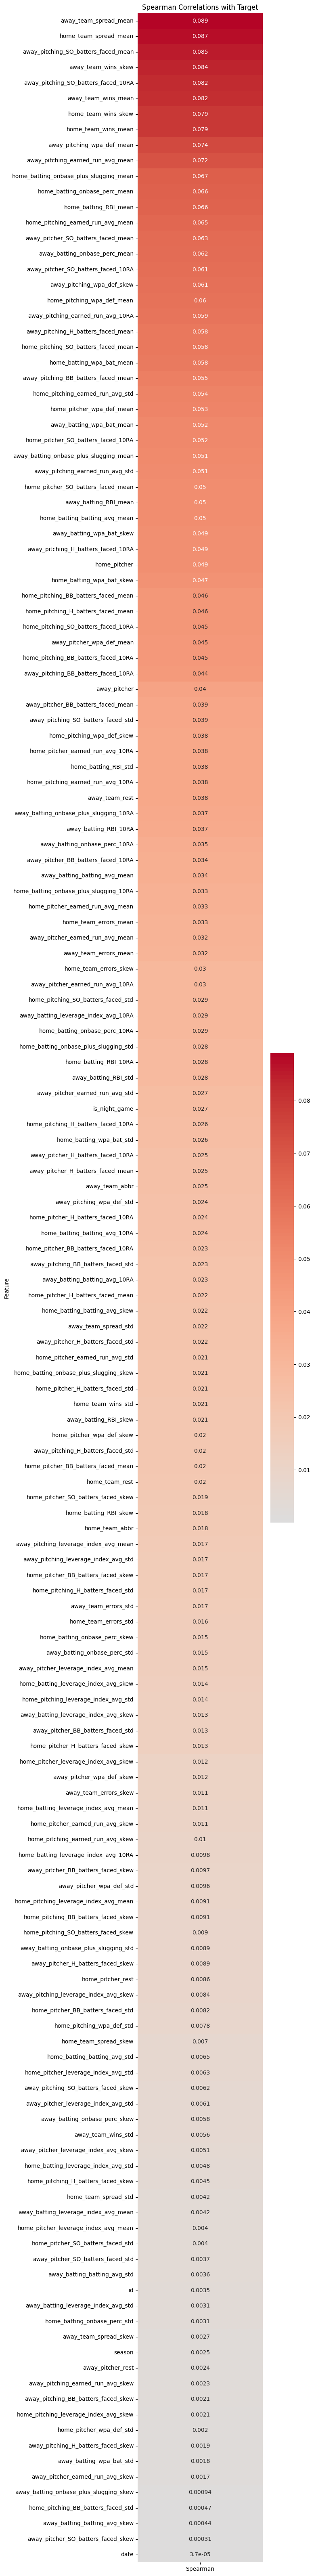

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def spearman_correlation_heatmap(X_train, y_train):
    # Ensure X_train contains only numeric data
    X_train = X_train.select_dtypes(include='number')
    
    # Calculate Spearman correlation for each column in X_train with y_train
    spearman_corr = X_train.apply(lambda col: spearmanr(col, y_train)[0])
    
    # Create a DataFrame for correlations and sort by absolute value in descending order
    corr_df = pd.DataFrame({
        'Feature': spearman_corr.index,
        'Spearman': spearman_corr.values
    }).set_index('Feature')
    corr_df = corr_df.abs().sort_values(by='Spearman', ascending=False)  # Sort by absolute correlation

    # Plot the heatmap for sorted Spearman correlations
    plt.figure(figsize=(5, len(corr_df) // 2))  # Dynamically adjust height
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar=True)
    plt.title('Spearman Correlations with Target')
    plt.show()

# Usage example:
spearman_correlation_heatmap(X_train, y_train)


In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Convert training and validation sets to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Use 'multi:softmax' for multi-class classification
    'eval_metric': 'logloss',       # Evaluation metric
    'eta': 0.1,                     # Learning rate
    'max_depth': 5,                 # Tree depth
    'seed': 42,                     # Random seed
    'tree_method': 'gpu_hist'       # Enables GPU training
}

# Define evaluation sets
evals = [(dtrain, 'train'), (dval, 'eval')]

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)

# Make predictions on the validation set
y_pred_proba = bst.predict(dval)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))


[0]	train-logloss:0.68657	eval-logloss:0.68895
[1]	train-logloss:0.68155	eval-logloss:0.68754
[2]	train-logloss:0.67668	eval-logloss:0.68689
[3]	train-logloss:0.67220	eval-logloss:0.68618
[4]	train-logloss:0.66807	eval-logloss:0.68550
[5]	train-logloss:0.66401	eval-logloss:0.68441
[6]	train-logloss:0.66028	eval-logloss:0.68462
[7]	train-logloss:0.65632	eval-logloss:0.68406
[8]	train-logloss:0.65287	eval-logloss:0.68386
[9]	train-logloss:0.64915	eval-logloss:0.68353
[10]	train-logloss:0.64583	eval-logloss:0.68364
[11]	train-logloss:0.64241	eval-logloss:0.68260
[12]	train-logloss:0.63930	eval-logloss:0.68184
[13]	train-logloss:0.63592	eval-logloss:0.68129
[14]	train-logloss:0.63306	eval-logloss:0.68140
[15]	train-logloss:0.63106	eval-logloss:0.68115
[16]	train-logloss:0.62836	eval-logloss:0.68096
[17]	train-logloss:0.62553	eval-logloss:0.68109
[18]	train-logloss:0.62279	eval-logloss:0.68107
[19]	train-logloss:0.62066	eval-logloss:0.68088
[20]	train-logloss:0.61823	eval-logloss:0.68099
[2

/home/jason/anaconda3/envs/ML_final/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:27:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[36]	train-logloss:0.58017	eval-logloss:0.68113
[37]	train-logloss:0.57783	eval-logloss:0.68068
[38]	train-logloss:0.57582	eval-logloss:0.68048
Accuracy: 0.5672990063233966
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.43      0.48      1020
           1       0.58      0.69      0.63      1194

    accuracy                           0.57      2214
   macro avg       0.56      0.56      0.55      2214
weighted avg       0.56      0.57      0.56      2214



In [18]:
test_data = pd.read_csv('same_season_test_data.csv')
test_data.shape

(6185, 165)

In [19]:
#Inference model

test_data = test_data.replace({True: 1, False: 0})
# Function to fill NaN values with group average
def fill_na_with_group_mean(df, group_col, target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(
        lambda x: x.fillna(x.mean())
    )

# Apply the function to all columns except the grouping column
group_column = 'home_team_abbr'

for column in test_data.columns:
    if column != group_column and test_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(test_data, group_column, column)

group_column = 'away_team_abbr'

for column in test_data.columns:
    if column != group_column and test_data[column].dtype != 'object':  # Skip non-numeric columns
        fill_na_with_group_mean(test_data, group_column, column)



/tmp/ipykernel_16170/1964563735.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data = test_data.replace({True: 1, False: 0})


In [20]:
test_data.shape

(6185, 165)

In [21]:
X_test  = test_data.drop([ 'id', 'home_team_season', 'away_team_season', 'home_team_abbr', 'away_team_abbr', 'home_pitcher', 'away_pitcher'], axis=1)
X_test.fillna(0, inplace=True)

total_nan_count = X_test.isna().sum().sum()
print(total_nan_count)

0


In [22]:
X_test.head()

,is_night_game,home_team_rest,away_team_rest,home_pitcher_rest,away_pitcher_rest,season,home_batting_batting_avg_10RA,home_batting_onbase_perc_10RA,home_batting_onbase_plus_slugging_10RA,home_batting_leverage_index_avg_10RA,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0.0,1.0,1.0,5.000000,5.0,2017.0,0.815178,-0.139214,0.860108,-0.685997,...,1.897061,-0.021571,0.045967,0.657736,-0.105414,-0.215965,-0.341056,0.710790,-0.305795,-1.103229
1,1.0,1.0,1.0,6.000000,5.0,2023.0,-0.819056,-1.043317,-0.501758,0.266741,...,-0.174718,0.206991,-0.365752,-0.660023,-0.166158,-0.400556,0.189584,-0.129330,0.467740,0.873353
2,1.0,2.0,2.0,7.000000,6.0,2016.0,0.566940,0.133967,1.167550,-0.119877,...,2.960091,-0.027093,0.200172,0.096058,-0.088088,1.423080,1.902420,-0.486104,0.380234,0.944937
3,0.0,1.0,1.0,5.000000,5.0,2019.0,0.842760,-0.271643,0.494216,0.384107,...,-0.345691,-0.517786,-0.160474,0.970894,-0.028288,-0.272571,-0.366498,-0.583598,0.654581,-0.021218
4,0.0,1.0,1.0,7.186528,6.0,2016.0,1.849503,1.038070,0.939598,0.722399,...,0.948865,-0.248708,-0.401949,-0.229898,0.047862,-0.396524,-0.862731,-0.262628,0.444447,-0.113465


In [23]:
X_test.shape
test_data.shape
train_data.shape

(11067, 165)

In [24]:
# Convert X_test to DMatrix format
dtest = xgb.DMatrix(X_test)

# Make predictions
y_pred = bst.predict(dtest)

# Add predictions to the test data and prepare the submission
test_data['home_team_win'] = y_pred
# Convert predictions to True or False based on the threshold
test_data['home_team_win'] = np.where(y_pred >= 0.5, True, False)
submission = test_data[['id', 'home_team_win']]

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Preview the submission
submission.head()



ValueError: feature_names mismatch: ['id', 'home_team_abbr', 'away_team_abbr', 'date', 'is_night_game', 'home_pitcher', 'away_pitcher', 'home_team_rest', 'away_team_rest', 'home_pitcher_rest', 'away_pitcher_rest', 'season', 'home_batting_batting_avg_10RA', 'home_batting_onbase_perc_10RA', 'home_batting_onbase_plus_slugging_10RA', 'home_batting_leverage_index_avg_10RA', 'home_batting_RBI_10RA', 'away_batting_batting_avg_10RA', 'away_batting_onbase_perc_10RA', 'away_batting_onbase_plus_slugging_10RA', 'away_batting_leverage_index_avg_10RA', 'away_batting_RBI_10RA', 'home_pitching_earned_run_avg_10RA', 'home_pitching_SO_batters_faced_10RA', 'home_pitching_H_batters_faced_10RA', 'home_pitching_BB_batters_faced_10RA', 'away_pitching_earned_run_avg_10RA', 'away_pitching_SO_batters_faced_10RA', 'away_pitching_H_batters_faced_10RA', 'away_pitching_BB_batters_faced_10RA', 'home_pitcher_earned_run_avg_10RA', 'home_pitcher_SO_batters_faced_10RA', 'home_pitcher_H_batters_faced_10RA', 'home_pitcher_BB_batters_faced_10RA', 'away_pitcher_earned_run_avg_10RA', 'away_pitcher_SO_batters_faced_10RA', 'away_pitcher_H_batters_faced_10RA', 'away_pitcher_BB_batters_faced_10RA', 'home_team_errors_mean', 'home_team_errors_std', 'home_team_errors_skew', 'away_team_errors_mean', 'away_team_errors_std', 'away_team_errors_skew', 'home_team_spread_mean', 'home_team_spread_std', 'home_team_spread_skew', 'away_team_spread_mean', 'away_team_spread_std', 'away_team_spread_skew', 'home_team_wins_mean', 'home_team_wins_std', 'home_team_wins_skew', 'away_team_wins_mean', 'away_team_wins_std', 'away_team_wins_skew', 'home_batting_batting_avg_mean', 'home_batting_batting_avg_std', 'home_batting_batting_avg_skew', 'home_batting_onbase_perc_mean', 'home_batting_onbase_perc_std', 'home_batting_onbase_perc_skew', 'home_batting_onbase_plus_slugging_mean', 'home_batting_onbase_plus_slugging_std', 'home_batting_onbase_plus_slugging_skew', 'home_batting_leverage_index_avg_mean', 'home_batting_leverage_index_avg_std', 'home_batting_leverage_index_avg_skew', 'home_batting_wpa_bat_mean', 'home_batting_wpa_bat_std', 'home_batting_wpa_bat_skew', 'home_batting_RBI_mean', 'home_batting_RBI_std', 'home_batting_RBI_skew', 'away_batting_batting_avg_mean', 'away_batting_batting_avg_std', 'away_batting_batting_avg_skew', 'away_batting_onbase_perc_mean', 'away_batting_onbase_perc_std', 'away_batting_onbase_perc_skew', 'away_batting_onbase_plus_slugging_mean', 'away_batting_onbase_plus_slugging_std', 'away_batting_onbase_plus_slugging_skew', 'away_batting_leverage_index_avg_mean', 'away_batting_leverage_index_avg_std', 'away_batting_leverage_index_avg_skew', 'away_batting_wpa_bat_mean', 'away_batting_wpa_bat_std', 'away_batting_wpa_bat_skew', 'away_batting_RBI_mean', 'away_batting_RBI_std', 'away_batting_RBI_skew', 'home_pitching_earned_run_avg_mean', 'home_pitching_earned_run_avg_std', 'home_pitching_earned_run_avg_skew', 'home_pitching_SO_batters_faced_mean', 'home_pitching_SO_batters_faced_std', 'home_pitching_SO_batters_faced_skew', 'home_pitching_H_batters_faced_mean', 'home_pitching_H_batters_faced_std', 'home_pitching_H_batters_faced_skew', 'home_pitching_BB_batters_faced_mean', 'home_pitching_BB_batters_faced_std', 'home_pitching_BB_batters_faced_skew', 'home_pitching_leverage_index_avg_mean', 'home_pitching_leverage_index_avg_std', 'home_pitching_leverage_index_avg_skew', 'home_pitching_wpa_def_mean', 'home_pitching_wpa_def_std', 'home_pitching_wpa_def_skew', 'away_pitching_earned_run_avg_mean', 'away_pitching_earned_run_avg_std', 'away_pitching_earned_run_avg_skew', 'away_pitching_SO_batters_faced_mean', 'away_pitching_SO_batters_faced_std', 'away_pitching_SO_batters_faced_skew', 'away_pitching_H_batters_faced_mean', 'away_pitching_H_batters_faced_std', 'away_pitching_H_batters_faced_skew', 'away_pitching_BB_batters_faced_mean', 'away_pitching_BB_batters_faced_std', 'away_pitching_BB_batters_faced_skew', 'away_pitching_leverage_index_avg_mean', 'away_pitching_leverage_index_avg_std', 'away_pitching_leverage_index_avg_skew', 'away_pitching_wpa_def_mean', 'away_pitching_wpa_def_std', 'away_pitching_wpa_def_skew', 'home_pitcher_earned_run_avg_mean', 'home_pitcher_earned_run_avg_std', 'home_pitcher_earned_run_avg_skew', 'home_pitcher_SO_batters_faced_mean', 'home_pitcher_SO_batters_faced_std', 'home_pitcher_SO_batters_faced_skew', 'home_pitcher_H_batters_faced_mean', 'home_pitcher_H_batters_faced_std', 'home_pitcher_H_batters_faced_skew', 'home_pitcher_BB_batters_faced_mean', 'home_pitcher_BB_batters_faced_std', 'home_pitcher_BB_batters_faced_skew', 'home_pitcher_leverage_index_avg_mean', 'home_pitcher_leverage_index_avg_std', 'home_pitcher_leverage_index_avg_skew', 'home_pitcher_wpa_def_mean', 'home_pitcher_wpa_def_std', 'home_pitcher_wpa_def_skew', 'away_pitcher_earned_run_avg_mean', 'away_pitcher_earned_run_avg_std', 'away_pitcher_earned_run_avg_skew', 'away_pitcher_SO_batters_faced_mean', 'away_pitcher_SO_batters_faced_std', 'away_pitcher_SO_batters_faced_skew', 'away_pitcher_H_batters_faced_mean', 'away_pitcher_H_batters_faced_std', 'away_pitcher_H_batters_faced_skew', 'away_pitcher_BB_batters_faced_mean', 'away_pitcher_BB_batters_faced_std', 'away_pitcher_BB_batters_faced_skew', 'away_pitcher_leverage_index_avg_mean', 'away_pitcher_leverage_index_avg_std', 'away_pitcher_leverage_index_avg_skew', 'away_pitcher_wpa_def_mean', 'away_pitcher_wpa_def_std', 'away_pitcher_wpa_def_skew'] ['is_night_game', 'home_team_rest', 'away_team_rest', 'home_pitcher_rest', 'away_pitcher_rest', 'season', 'home_batting_batting_avg_10RA', 'home_batting_onbase_perc_10RA', 'home_batting_onbase_plus_slugging_10RA', 'home_batting_leverage_index_avg_10RA', 'home_batting_RBI_10RA', 'away_batting_batting_avg_10RA', 'away_batting_onbase_perc_10RA', 'away_batting_onbase_plus_slugging_10RA', 'away_batting_leverage_index_avg_10RA', 'away_batting_RBI_10RA', 'home_pitching_earned_run_avg_10RA', 'home_pitching_SO_batters_faced_10RA', 'home_pitching_H_batters_faced_10RA', 'home_pitching_BB_batters_faced_10RA', 'away_pitching_earned_run_avg_10RA', 'away_pitching_SO_batters_faced_10RA', 'away_pitching_H_batters_faced_10RA', 'away_pitching_BB_batters_faced_10RA', 'home_pitcher_earned_run_avg_10RA', 'home_pitcher_SO_batters_faced_10RA', 'home_pitcher_H_batters_faced_10RA', 'home_pitcher_BB_batters_faced_10RA', 'away_pitcher_earned_run_avg_10RA', 'away_pitcher_SO_batters_faced_10RA', 'away_pitcher_H_batters_faced_10RA', 'away_pitcher_BB_batters_faced_10RA', 'home_team_errors_mean', 'home_team_errors_std', 'home_team_errors_skew', 'away_team_errors_mean', 'away_team_errors_std', 'away_team_errors_skew', 'home_team_spread_mean', 'home_team_spread_std', 'home_team_spread_skew', 'away_team_spread_mean', 'away_team_spread_std', 'away_team_spread_skew', 'home_team_wins_mean', 'home_team_wins_std', 'home_team_wins_skew', 'away_team_wins_mean', 'away_team_wins_std', 'away_team_wins_skew', 'home_batting_batting_avg_mean', 'home_batting_batting_avg_std', 'home_batting_batting_avg_skew', 'home_batting_onbase_perc_mean', 'home_batting_onbase_perc_std', 'home_batting_onbase_perc_skew', 'home_batting_onbase_plus_slugging_mean', 'home_batting_onbase_plus_slugging_std', 'home_batting_onbase_plus_slugging_skew', 'home_batting_leverage_index_avg_mean', 'home_batting_leverage_index_avg_std', 'home_batting_leverage_index_avg_skew', 'home_batting_wpa_bat_mean', 'home_batting_wpa_bat_std', 'home_batting_wpa_bat_skew', 'home_batting_RBI_mean', 'home_batting_RBI_std', 'home_batting_RBI_skew', 'away_batting_batting_avg_mean', 'away_batting_batting_avg_std', 'away_batting_batting_avg_skew', 'away_batting_onbase_perc_mean', 'away_batting_onbase_perc_std', 'away_batting_onbase_perc_skew', 'away_batting_onbase_plus_slugging_mean', 'away_batting_onbase_plus_slugging_std', 'away_batting_onbase_plus_slugging_skew', 'away_batting_leverage_index_avg_mean', 'away_batting_leverage_index_avg_std', 'away_batting_leverage_index_avg_skew', 'away_batting_wpa_bat_mean', 'away_batting_wpa_bat_std', 'away_batting_wpa_bat_skew', 'away_batting_RBI_mean', 'away_batting_RBI_std', 'away_batting_RBI_skew', 'home_pitching_earned_run_avg_mean', 'home_pitching_earned_run_avg_std', 'home_pitching_earned_run_avg_skew', 'home_pitching_SO_batters_faced_mean', 'home_pitching_SO_batters_faced_std', 'home_pitching_SO_batters_faced_skew', 'home_pitching_H_batters_faced_mean', 'home_pitching_H_batters_faced_std', 'home_pitching_H_batters_faced_skew', 'home_pitching_BB_batters_faced_mean', 'home_pitching_BB_batters_faced_std', 'home_pitching_BB_batters_faced_skew', 'home_pitching_leverage_index_avg_mean', 'home_pitching_leverage_index_avg_std', 'home_pitching_leverage_index_avg_skew', 'home_pitching_wpa_def_mean', 'home_pitching_wpa_def_std', 'home_pitching_wpa_def_skew', 'away_pitching_earned_run_avg_mean', 'away_pitching_earned_run_avg_std', 'away_pitching_earned_run_avg_skew', 'away_pitching_SO_batters_faced_mean', 'away_pitching_SO_batters_faced_std', 'away_pitching_SO_batters_faced_skew', 'away_pitching_H_batters_faced_mean', 'away_pitching_H_batters_faced_std', 'away_pitching_H_batters_faced_skew', 'away_pitching_BB_batters_faced_mean', 'away_pitching_BB_batters_faced_std', 'away_pitching_BB_batters_faced_skew', 'away_pitching_leverage_index_avg_mean', 'away_pitching_leverage_index_avg_std', 'away_pitching_leverage_index_avg_skew', 'away_pitching_wpa_def_mean', 'away_pitching_wpa_def_std', 'away_pitching_wpa_def_skew', 'home_pitcher_earned_run_avg_mean', 'home_pitcher_earned_run_avg_std', 'home_pitcher_earned_run_avg_skew', 'home_pitcher_SO_batters_faced_mean', 'home_pitcher_SO_batters_faced_std', 'home_pitcher_SO_batters_faced_skew', 'home_pitcher_H_batters_faced_mean', 'home_pitcher_H_batters_faced_std', 'home_pitcher_H_batters_faced_skew', 'home_pitcher_BB_batters_faced_mean', 'home_pitcher_BB_batters_faced_std', 'home_pitcher_BB_batters_faced_skew', 'home_pitcher_leverage_index_avg_mean', 'home_pitcher_leverage_index_avg_std', 'home_pitcher_leverage_index_avg_skew', 'home_pitcher_wpa_def_mean', 'home_pitcher_wpa_def_std', 'home_pitcher_wpa_def_skew', 'away_pitcher_earned_run_avg_mean', 'away_pitcher_earned_run_avg_std', 'away_pitcher_earned_run_avg_skew', 'away_pitcher_SO_batters_faced_mean', 'away_pitcher_SO_batters_faced_std', 'away_pitcher_SO_batters_faced_skew', 'away_pitcher_H_batters_faced_mean', 'away_pitcher_H_batters_faced_std', 'away_pitcher_H_batters_faced_skew', 'away_pitcher_BB_batters_faced_mean', 'away_pitcher_BB_batters_faced_std', 'away_pitcher_BB_batters_faced_skew', 'away_pitcher_leverage_index_avg_mean', 'away_pitcher_leverage_index_avg_std', 'away_pitcher_leverage_index_avg_skew', 'away_pitcher_wpa_def_mean', 'away_pitcher_wpa_def_std', 'away_pitcher_wpa_def_skew']
expected away_team_abbr, date, home_team_abbr, id, home_pitcher, away_pitcher in input data

In [ ]:
submission.shape

(6185, 2)

In [ ]:
sample_data = pd.read_csv('same_season_sample_submission.csv')

In [ ]:
sample_data.shape

(6185, 2)